In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
import pickle

plt.rcParams["figure.figsize"] = (15, 10)

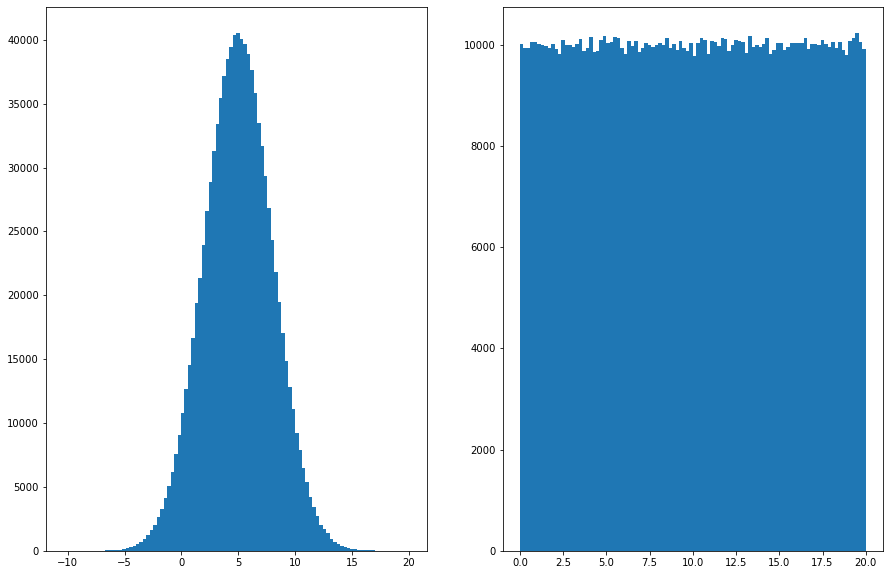

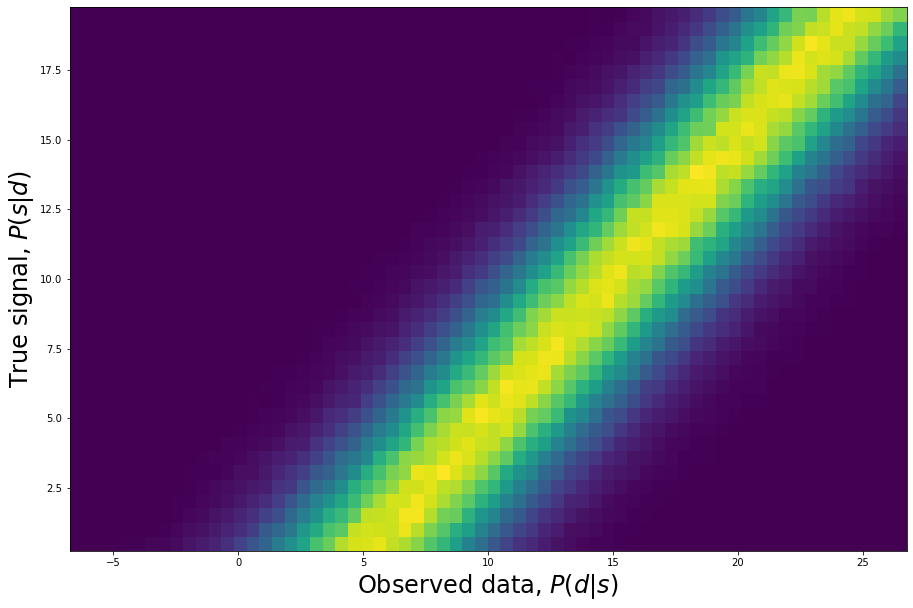

In [3]:
x = np.linspace(0, 20, 1000000)
background = np.random.normal(5, 3, 1000000)
signal = np.random.uniform(0, 20, 1000000)
data = background + signal

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(background, 100)
ax2.hist(signal, 100)
plt.show()


signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

In [4]:
def takeSignalSlice(value):
    index = 0
    for i in range(len(signaledges)):
        if (value > signaledges[i]):
            index = i
    return index - 1

In [5]:
def takeDataSlice(value):
    index = 0
    for i in range(len(dataedges)):
        if (value > dataedges[i]):
            index = i
    return index - 1

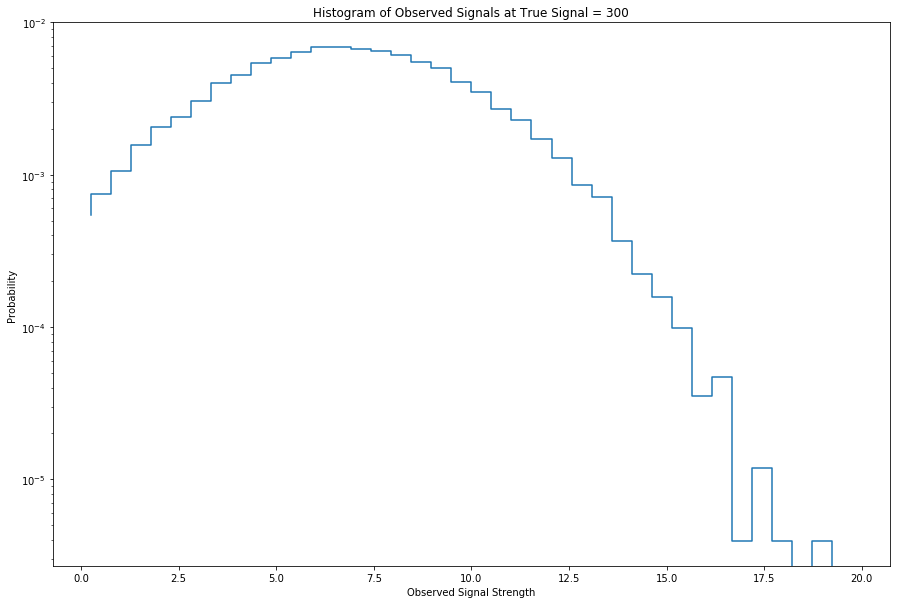

In [7]:
y = Psd[:][takeSignalSlice(20)]
plt.step(signalcenters, y)
plt.yscale('Log')
plt.title('Histogram of Observed Signals at True Signal')
plt.ylabel('Probability')
plt.xlabel('Observed Signal Strength')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (67,) and (39,)

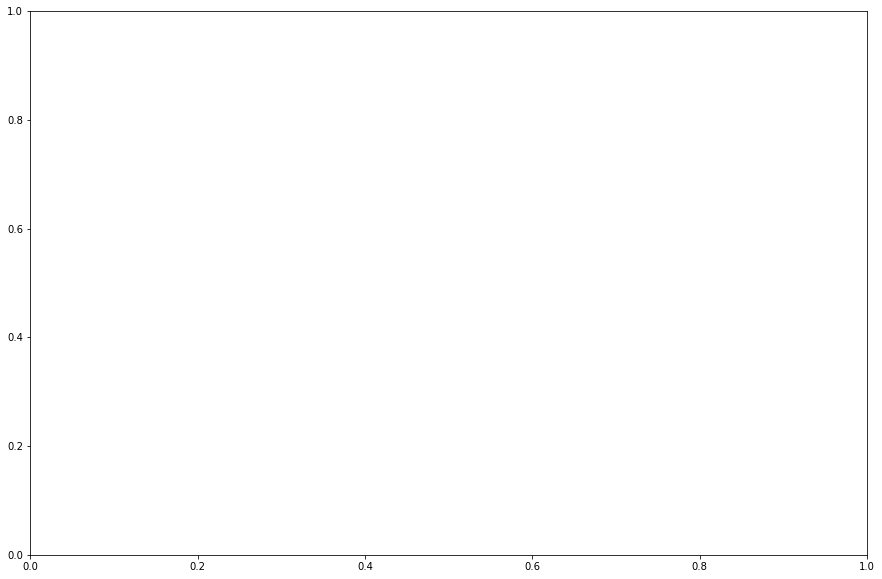

In [9]:
y = Psd[takeDataSlice(20)][:]
plt.step(datacenters, y)
plt.yscale('Log')
plt.title('Histogram of True Injected Signals at Observed Signal')
plt.ylabel('Probability')
plt.xlabel('True Injected Signal Strength')
plt.show()